<a href="https://colab.research.google.com/github/naga8199/CMPE257-Fall23-NagaLakshmi-Nagubandi/blob/take-home-exam/257_takehomexam_016648710ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 2 - Breast Cancer Data Set

In [ ]:
# Importing the Required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loading the dataset into a data frame
df = pd.read_csv('breast_cancer_dataset_preprocessed.csv')

# Separating the features and the target column
X = df.drop('y', axis=1)
y = df['y']

# Splitting the dataset into training and testing sets(80% Training and 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=710)

# Scaling the features
# Scaling ensures data is in consistent format for all the features
# In standard scaler data is tranformed to have mean value of 0 and standard deviation of 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating a list of models to compare
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC()]

# Creating a dictionary to store the results of the models
results = {}

# Looping through all the models
for model in models:
    # Fitting the model on the training data set
    model.fit(X_train, y_train)
    # Predicting on the test set
    y_pred = model.predict(X_test)
    # Calculating the accuracy score of the models
    acc = accuracy_score(y_test, y_pred)
    # Storing the results in the 'results' dictionary
    results[type(model).__name__] = acc

# Printing the results of the models
print(results)

# Finding the best performing model among all the models
best_model = max(results, key=results.get)
best_acc = results[best_model]

# Printing the best performing model name with the accuracy
print(f'The best performing model is {best_model} with an accuracy of {best_acc:.2f}')

# Evaluating the best performing model on the test set
best_model = eval(best_model)()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
cla_rep = classification_report(y_test, y_pred)

# Printing the confusion matrix and the classification report of the best performing algorithm
print('Confusion matrix:')
print(conf_mat)
print('Classification report:')
print(cla_rep)

{'LogisticRegression': 0.961038961038961, 'DecisionTreeClassifier': 0.961038961038961, 'RandomForestClassifier': 0.961038961038961, 'SVC': 0.961038961038961}
The best performing model is LogisticRegression with an accuracy of 0.96
Confusion matrix:
[[41  1]
 [ 2 33]]
Classification report:
              precision    recall  f1-score   support

           B       0.95      0.98      0.96        42
           M       0.97      0.94      0.96        35

    accuracy                           0.96        77
   macro avg       0.96      0.96      0.96        77
weighted avg       0.96      0.96      0.96        77



The code above is based on the following methodology:

- Used Pandas library to load the dataset from a csv file into a data frame.
- Then separated the features and the target column.
- Used Sklearn library to split the dataset into training and testing sets with a test size of 0.2(means 80% training and 20% testing) and a random state of 710 as instructed by the last 3 digits of SJSU ID.
- Used Sklearn to scale the all the features using StandardScaler to make sure all features are in same format which in turn improves the performance of the models.
- Used Sklearn to create four different machine learning models: Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine. I have chosen these models because they are most widely used algorithms for classification tasks and each one have different strengths and weaknesses.
- Used Sklearn to fit each model on the training set and to predict results on the test set. There are so many metrics to evaluate the performance of the models but I used accuracy score as the performance metric to compare the models. I stored the results of the models in a dictionary called 'results' for easy access.
- Used Python library to find the best performing model based on the highest accuracy score. I printed the algorithm name and the accuracy of the best performing model.
- Used sklearn library to calculate the best performing model on the test set by using confusion matrix and classification report. These metrics provide more information about the model's performance such as precision, recall, and f1-score for each class. I printed the confusion matrix and the classification report for the best performing model.

Task 1 - The Synthetic Dataset

Degree: 1, Training Error: 0.2971653474382958, Validation Error: 1.0221522611329286
Degree: 2, Training Error: 0.264225596249698, Validation Error: 1.044010918544582
Degree: 3, Training Error: 0.15967947248065617, Validation Error: 1.3488703972348894
Degree: 4, Training Error: 0.13798827842996003, Validation Error: 1.3900292844003834


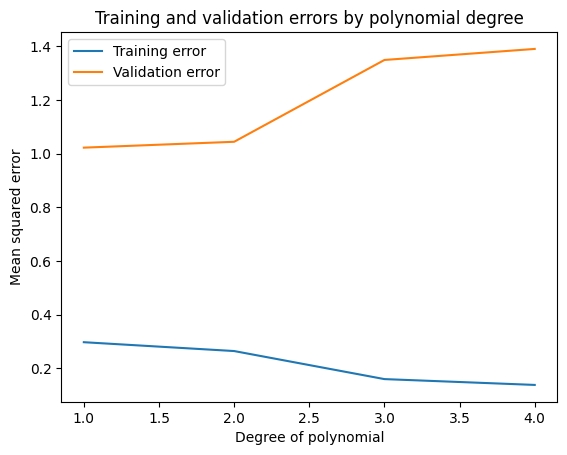

In [ ]:
# Importing the Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Loading the training and validations datasets
train_df = pd.read_csv('synthetic_dataset.csv')
val_df = pd.read_csv('synthetic_test_dataset.csv')

# Separating the features and the target for training data set
# Separating the features and the target for validation data set
X_train = train_df[['x1', 'x2']].values
y_train = train_df['y'].values.reshape(-1, 1)
X_val = val_df[['x1', 'x2']].values
y_val = val_df['y'].values.reshape(-1, 1)

# Creating a list of polynomial degrees to compare their performance
degrees = [1, 2, 3, 4]

# Creating empty lists to store the training and validation errors of the polynomials
train_errors = []
val_errors = []

# Looping through the polynomial degrees
for degree in degrees:
    # Creating a polynomial transformer
    poly = PolynomialFeatures(degree=degree)
    # Transforming the features
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    # Creating a linear model
    model = LinearRegression()
    # Fitting the model on the training set
    model.fit(X_train_poly, y_train)
    # Predicting on the training and validation sets
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    # Calculating the mean squared errors for training and validation data sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    print(f"Degree: {degree}, Training Error: {train_mse}, Validation Error: {val_mse}")
    # Storing the training and validation errors in the lists
    train_errors.append(train_mse)
    val_errors.append(val_mse)

# Plotting the training and validation errors by degree
plt.plot(degrees, train_errors, label='Training error')
plt.plot(degrees, val_errors, label='Validation error')
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean squared error')
plt.title('Training and validation errors by polynomial degree')
plt.legend()
plt.show()


From the above results, we can see that training error is decreasing with higher degress of polynomial. That means models are fitted better with the training data with the increased complexity. But I can see contrast results in case of validation errors. Validation errors is increasing after the second degree polynomial. That means models are starting to overfit the training data and performing bad on unseen validation data set.

**I choose 3rd degree polynomial**

It is important to balance this trade-off between bias and variance before selecting the appropriate model. The Degree 3 polynomial in this scenario is balancing well between bias and varience. The model has a lower error than linear and quadratic models, meaning it fits the data better.

The fourth degree model offers the lowest errors, but may also be prone to overfitting. An overfitted model captures noise from the training data, which can negatively affect its performance when applied to new, unknown data.

There is a relatively close relationship between the validation error of the 3rd degree model and the validation error of the 4th degree model, suggesting that it generalizes well without requiring the additional complexity of a 4th degree model.

References : w3 schools, stackoverflow, TowardsDataScience websites.